In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
# import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [ ]:
df = pd.read_csv(r"C:\Users\aryan\OneDrive\Desktop\house price 3.csv")


In [ ]:
df.shape


(4600, 18)

In [ ]:
df.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4599.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.240705,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.778481,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.describe(include='object')


,date,waterfront,street,city,statezip,country
count,4600,4596,4600,4600,4600,4599
unique,70,3,4525,44,77,2
top,23/06/14 0:00,0,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4561,4,1573,148,4597


In [ ]:
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/14 0:00,313000.0,3,1.50,1340,7912,1.5,0,0.0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/14 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/14 0:00,342000.0,3,2.00,1930,11947,1.0,0,0.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/14 0:00,420000.0,3,2.25,2000,8030,1.0,0,0.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/14 0:00,550000.0,4,2.50,1940,10500,1.0,0,0.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.tail()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,09/07/14 0:00,308166.6667,3,1.75,1510,6360,1.0,0,0.0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09/07/14 0:00,534333.3333,3,2.50,1460,7573,2.0,0,0.0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09/07/14 0:00,416904.1667,3,2.50,3010,7014,2.0,0,0.0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10/07/14 0:00,203400.0000,4,2.00,2090,6630,1.0,0,0.0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,10/07/14 0:00,220600.0000,3,2.50,1490,8102,2.0,0,0.0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [ ]:
df.isnull().sum()


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       4
view             1
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          1
dtype: int64

In [ ]:
df.ndim
df.size
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4596 non-null   object 
 8   view           4599 non-null   float64
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4599 non-null   object 
dtypes: float

Shape of DataFrame: (4600, 18)
Columns in DataFrame: Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')
Data Types of Columns: date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view             float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object
First 5 rows of DataFrame:
             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02/05/14 0:00   313000.0         3       1.50         1340      7912   
1  02/05/14 0:00 

In [ ]:
# Checking a few rows of the 'date' column to better understand the date format in the dataset
data['date'].head(20)


0     02/05/14 0:00
1     02/05/14 0:00
2     02/05/14 0:00
3     02/05/14 0:00
4     02/05/14 0:00
5     02/05/14 0:00
6     02/05/14 0:00
7     02/05/14 0:00
8     02/05/14 0:00
9     02/05/14 0:00
10    02/05/14 0:00
11    02/05/14 0:00
12    02/05/14 0:00
13    02/05/14 0:00
14    02/05/14 0:00
15    02/05/14 0:00
16    02/05/14 0:00
17    02/05/14 0:00
18    02/05/14 0:00
19    02/05/14 0:00
Name: date, dtype: object

In [ ]:
# Correcting the date conversion with dayfirst=True
data['date'] = pd.to_datetime(data['date'], dayfirst=True, format='%d/%m/%y %H:%M')

# Proceed with further cleaning and analysis
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0.0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
file_path = r'C:\Users\aryan\OneDrive\Desktop\house price 3.csv'
data = pd.read_csv(file_path)

In [ ]:
# Continue using dateutil to parse dates, letting errors be coerced
data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')

# Output the first few rows of the date column to check the result
data['date'].head()




0   2014-05-02
1   2014-05-02
2   2014-05-02
3   2014-05-02
4   2014-05-02
Name: date, dtype: datetime64[ns]

In [ ]:
missing_values = data.isnull().sum()

# 3. Remove duplicates if any
data = data.drop_duplicates()

# 4. Drop unnecessary columns for the analysis (if needed)
data_cleaned = data.drop(['street', 'city', 'statezip', 'country'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4596 non-null   object        
 8   view           4599 non-null   float64       
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(8), object(1)
memory usage: 503.

D:\D\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


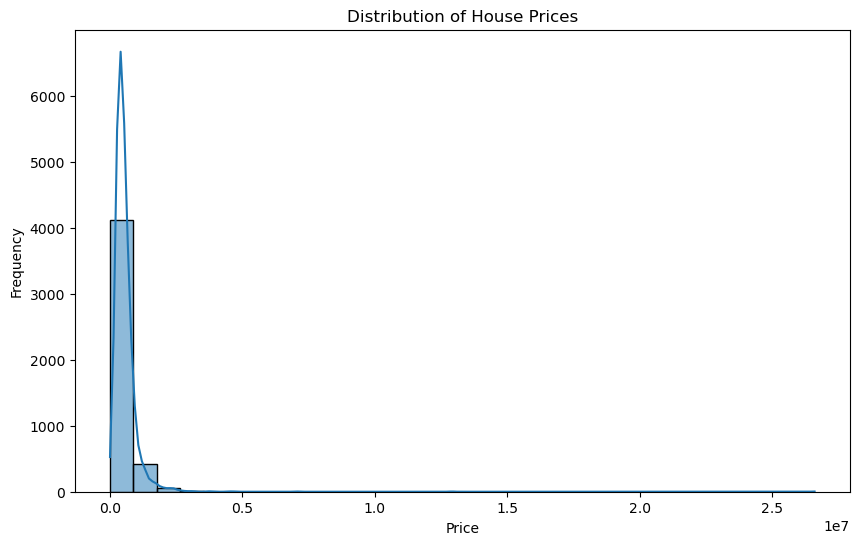

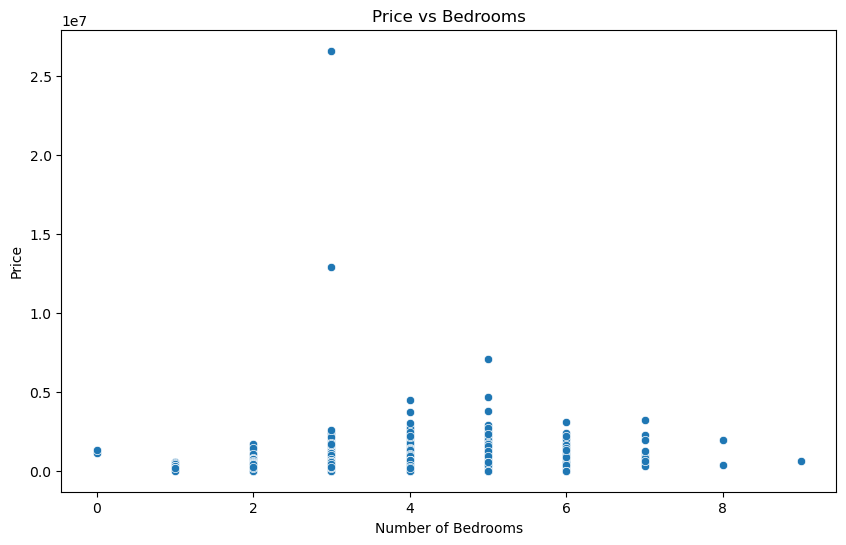

ValueError: could not convert string to float: '?'

<Figure size 1200x800 with 0 Axes>

In [ ]:
data_cleaned.info()

# Univariate Analysis: Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis: Price vs Bedrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=data_cleaned)
plt.title('Price vs Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# Multivariate Analysis: Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Multivariate Analysis: Pairplot for price, bedrooms, bathrooms, and sqft_living
sns.pairplot(data_cleaned[['price', 'bedrooms', 'bathrooms', 'sqft_living']])
plt.show()

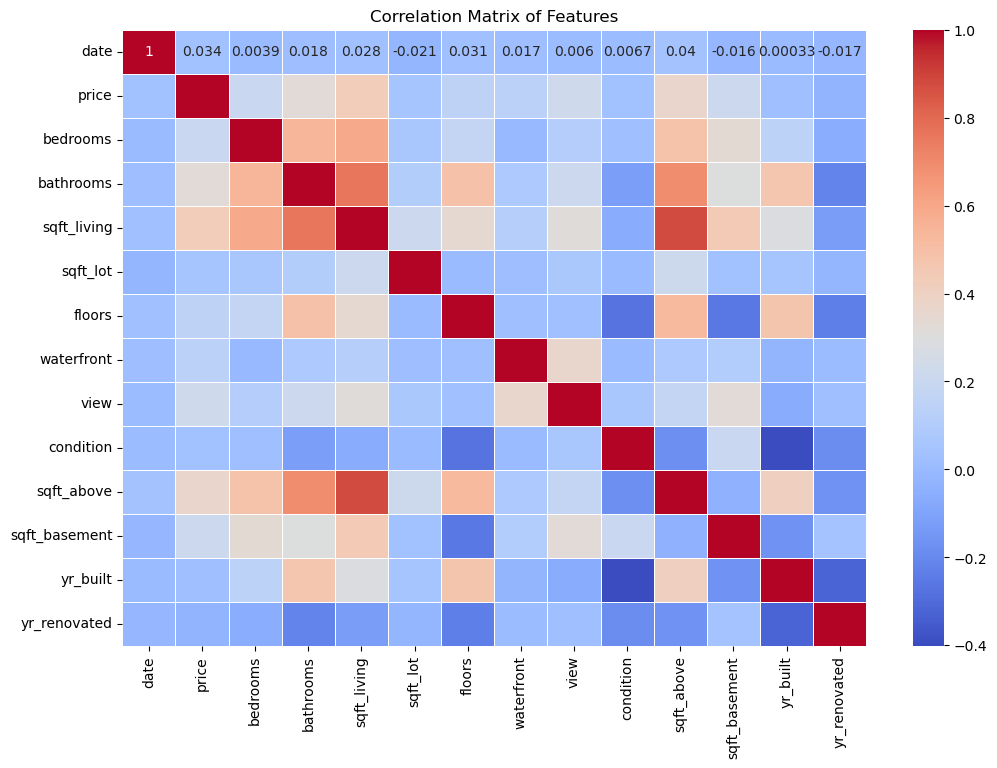

In [ ]:
import numpy as np

# 1. Replace '?' with NaN
data_cleaned.replace('?', np.nan, inplace=True)

# 2. Convert relevant columns to numeric (if necessary)
# If any columns should be numeric, try converting them explicitly
for col in data_cleaned.columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# 3. Drop rows with NaN values (optional depending on your analysis needs)
data_cleaned.dropna(inplace=True)

# 4. Now calculate the correlation matrix
corr_matrix = data_cleaned.corr()

# 5. Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

dataFrame1 =  pd.DataFrame({ 'StudentID': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                            'Score' : [89, 39, 50, 97, 22, 66, 31, 51, 71, 91, 56, 32, 52, 73, 92]})
dataFrame2 =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
                            'Score': [98, 93, 44, 77, 69, 56, 31, 53, 78, 93, 56, 77, 33, 56, 27]})
dataframe = pd.concat([dataFrame1, dataFrame2], ignore_index=True)
dataframe
pd.concat([dataFrame1, dataFrame2], axis=1)

df1SE =  pd.DataFrame({ 'StudentID': [9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                       'ScoreSE' : [22, 66, 31, 51, 71, 91, 56, 32, 52, 73, 92]})
df2SE =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
                       'ScoreSE': [98, 93, 44, 77, 69, 56, 31, 53, 78, 93, 56, 77, 33, 56, 27]})

df1ML =  pd.DataFrame({ 'StudentID': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                       'ScoreML' : [39, 49, 55, 77, 52, 86, 41, 77, 73, 51, 86, 82, 92, 23, 49]})
df2ML =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                       'ScoreML': [93, 44, 78, 97, 87, 89, 39, 43, 88, 78]})
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='inner')
df
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='left')
df
dfSE = pd.concat([df1SE, df2SE], ignore_index=True)
dfML = pd.concat([df1ML, df2ML], ignore_index=True)

df = dfSE.merge(dfML, how='right')
df
df = pd.read_csv('/house price.csv')
df.head(10)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/14 0:00,313000.0,3,1.50,1340,7912,1.5,0,0.0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/14 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/14 0:00,342000.0,3,2.00,1930,11947,1.0,0,0.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/14 0:00,420000.0,3,2.25,2000,8030,1.0,0,0.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/14 0:00,550000.0,4,2.50,1940,10500,1.0,0,0.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,02/05/14 0:00,490000.0,2,1.00,880,6380,1.0,0,0.0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,02/05/14 0:00,335000.0,2,2.00,1350,2560,1.0,0,0.0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,02/05/14 0:00,482000.0,4,2.50,2710,35868,2.0,0,0.0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,02/05/14 0:00,452500.0,3,2.50,2430,88426,1.0,0,0.0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,02/05/14 0:00,640000.0,4,2.00,1520,6200,1.5,0,0.0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4599.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.240705,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.778481,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
data = np.arange(15).reshape((3,5))
indexers = ['Rainfall', 'Humidity', 'Wind']
dframe1 = pd.DataFrame(data, index=indexers, columns=['Bergen', 'Oslo', 'Trondheim', 'Stavanger', 'Kristiansand'])
dframe1


,Bergen,Oslo,Trondheim,Stavanger,Kristiansand
Rainfall,0,1,2,3,4
Humidity,5,6,7,8,9
Wind,10,11,12,13,14


In [ ]:
stacked = dframe1.stack()
stacked



stacked.unstack()


series1 = pd.Series([000, 111, 222, 333], index=['zeros','ones', 'twos', 'threes'])
series2 = pd.Series([444, 555, 666], index=['fours', 'fives', 'sixs'])

frame2 = pd.concat([series1, series2], keys=['Number1', 'Number2'])
frame2.unstack()



,fives,fours,ones,sixs,threes,twos,zeros
Number1,NaN,NaN,111.0,NaN,333.0,222.0,0.0
Number2,555.0,444.0,NaN,666.0,NaN,NaN,NaN


In [ ]:
#Performing data deduplication
#1. Let's consider a simple dataframe, as follows:
frame3 = pd.DataFrame({'column 1': ['Looping'] * 3 +
 ['Functions'] * 4, 'column 2': [10, 10, 22, 23, 23, 24, 24]})
frame3


#2. The pandas dataframe comes with a duplicated() method that returns a Boolean series stating which of the rows are duplicates:
frame3.duplicated()


#3. Now, we can drop these duplicates using the drop_duplicates() method:
frame4 = frame3.drop_duplicates()
frame4


#4. Let's add a new column and try to find duplicated items based on the second column:
frame3['column 3'] = range(7)
frame5 = frame3.drop_duplicates(['column 2'])
frame5

,column 1,column 2,column 3
0,Looping,10,0
2,Looping,22,2
3,Functions,23,3
5,Functions,24,5


In [ ]:
#find and replace some values inside a dataframe
import numpy as np
import pandas as pd
replaceFrame = pd.DataFrame({'column 1': [200.00, 3000., -786.,
            3000., 234., 444., -786., 332., 3332. ], 'column 2': range(9)})
replaceFrame


#Replace -786 as NaN - One replacement at a time
replaceFrame.replace(to_replace =-786, value= np.nan)


#Two or more replacement. All -786 values will be replaced by NaN and all 0 values will be replaced by 2.
replaceFrame = pd.DataFrame({'column 1': [200., 3000., -786.,
            3000., 234., 444., -786., 332., 3332. ], 'column 2': range(9)})
#All -786 values will be replaced by NaN and all 0 values will be replaced by 2.

replaceFrame.replace(to_replace =[-786, 0], value= [np.nan, 2])


,column 1,column 2
0,200.0,2
1,3000.0,1
2,NaN,2
3,3000.0,3
4,234.0,4
5,444.0,5
6,NaN,6
7,332.0,7
8,3332.0,8


In [ ]:
#Let's assume we have a dataframe as shown
data = np.arange(15, 30).reshape(5, 3)
dfx = pd.DataFrame(data, index=['apple', 'banana', 'kiwi',
'grapes', 'mango'], columns=['store1', 'store2', 'store3'])
dfx


#Let's add some missing values to our dataframe:
dfx['store4'] = np.nan
dfx.loc['watermelon'] = np.arange(15, 19)
dfx.loc['oranges'] = np.nan
dfx['store5'] = np.nan
dfx['store4']['apple'] = 20.
dfx


#Note the following characteristics of missing values in the preceding dataframe:
#An entire row can contain NaN values.
#An entire column can contain NaN values.
#Some (but not necessarily all) values in both a row and a column can be NaN.


#NaN values in pandas objects
#1. Check the following example:
dfx.isnull()


#2. Check it out in action:
dfx.notnull()


#3. We can use the sum() method to count the number of NaN values in each store.
dfx.isnull().sum()


#4. We can go one level deeper to find the total number of missing values
dfx.isnull().sum().sum()

<ipython-input-77-cf5f7c6d0214>:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfx['store4']['apple'] = 20.


15

In [ ]:
#5. So, instead of counting the number of missing values, we can count the number of reported values:
dfx.count()


,0
store1,6
store2,6
store3,6
store4,2
store5,0


In [ ]:
dfx.store4[dfx.store4.notnull()]


#The output shows that store4 only reported two items of data. Now, we can use the dropna() method to remove the rows


dfx.store4.dropna()


#Note that the dropna() method just returns a copy of the dataframe by dropping the rows with NaN.


#If dropna() is applied to the entire dataframe, then it will drop all the rows from the dataframe, because there is at least one NaN value in our dataframe:
dfx.dropna()


#####Dropping by rows
#We can also drop rows that have NaN values. To do so, we can use the how=all argument to drop only those rows entire values are entirely NaN:
dfx.dropna(how='all')


#Dropping by columns
#Furthermore, we can also pass axis=1 to indicate a check for NaN by columns.
dfx.dropna(how='all', axis=1)


#we can also pass another argument, thresh, to specify a minimum number of NaNs that must exist before the column should be dropped:
dfx.dropna(thresh=5, axis=1)


#Mathematical operations with NaN
ar1 = np.array([100, 200, np.nan, 300])
ser1 = pd.Series(ar1)
ar1.mean(), ser1.mean()

(nan, 200.0)

In [ ]:
#Let's compute the total quantity of fruits sold by store4:
ser2 = dfx.store4
ser2.sum()


#Average
ser2.mean()


#Cumulative Summing
#Let's compute the total quantity of fruits sold by store4:
ser2 = dfx.store4
ser2.sum()


#Average
ser2.mean()


#Cumulative Summing
ser2.cumsum()

#5.Filling missing values

#We can use the fillna() method to replace NaN values with any particular values.
filledDf = dfx.fillna(0)
filledDf


#Check the difference in the following between NaN and NA filling
dfx.mean()
filledDf.mean()



#Backward and forward filling
#forward-filling - method = ffill
dfx.store4.fillna(method='ffill')


#backwad-filling -method =bfill
dfx.store4.fillna(method='bfill')
filledDf = dfx.fillna(0)
filledDf


#Check the difference in the following between NaN and NA filling
dfx.mean()
filledDf.mean()



#Backward and forward filling
#forward-filling - method = ffill
dfx.store4.fillna(method='ffill')


#backwad-filling -method =bfill
dfx.store4.fillna(method='bfill')

<ipython-input-81-831aed6e00b4>:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfx.store4.fillna(method='ffill')
<ipython-input-81-831aed6e00b4>:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfx.store4.fillna(method='bfill')
<ipython-input-81-831aed6e00b4>:55: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfx.store4.fillna(method='ffill')
<ipython-input-81-831aed6e00b4>:59: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfx.store4.fillna(method='bfill')


,store4
apple,20.0
banana,18.0
kiwi,18.0
grapes,18.0
mango,18.0
watermelon,18.0
oranges,NaN


In [ ]:
#Let's say we have data on the heights of a group of students as follows:
height = [120, 122, 125, 127, 121, 123, 137, 131, 161, 145, 141, 132]


#And we want to convert that dataset into intervals of 118 to 125, 126 to 135, 136 to 160, and finally 160 and higher.


#To convert the preceding dataset into intervals, we can use the cut() method from pandas
import pandas as pd
bins = [118, 125, 135, 160, 200]
category = pd.cut(height, bins)
category


[(118, 125], (118, 125], (118, 125], (125, 135], (118, 125], ..., (125, 135], (160, 200], (135, 160], (135, 160], (125, 135]]
Length: 12
Categories (4, interval[int64, right]): [(118, 125] < (125, 135] < (135, 160] < (160, 200]]

In [ ]:
pd.value_counts(category)

<ipython-input-2-7a767266afe9>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(category)


,count
"(118, 125]",5
"(125, 135]",3
"(135, 160]",3
"(160, 200]",1


In [ ]:
#We can also indicate the bin names by passing a list of labels
bin_names = ['Short Height', 'Average height', 'Good Height', 'Taller']
pd.cut(height, bins, labels=bin_names)


['Short Height', 'Short Height', 'Short Height', 'Average height', 'Short Height', ..., 'Average height', 'Taller', 'Good Height', 'Good Height', 'Average height']
Length: 12
Categories (4, object): ['Short Height' < 'Average height' < 'Good Height' < 'Taller']

In [ ]:
#it is essential to note that if we pass just an integer for our bins, it will compute equal-length bins based on the minimum and maximum values in the data.
import numpy as np
#print(np.random.rand(40))  #Random numbers between 0 to 1
pd.cut(np.random.rand(40), 5, precision=2)

[(0.59, 0.78], (0.59, 0.78], (0.027, 0.21], (0.21, 0.4], (0.78, 0.96], ..., (0.027, 0.21], (0.027, 0.21], (0.027, 0.21], (0.21, 0.4], (0.027, 0.21]]
Length: 40
Categories (5, interval[float64, right]): [(0.027, 0.21] < (0.21, 0.4] < (0.4, 0.59] < (0.59, 0.78] <
                                           (0.78, 0.96]]

In [ ]:
#Pandas provides a qcut method that forms the bins based on sample quantiles
randomNumbers = np.random.rand(2000)
category3 = pd.qcut(randomNumbers, 4) # cut into quartiles
category3


[(-0.0009641000000000001, 0.25], (-0.0009641000000000001, 0.25], (-0.0009641000000000001, 0.25], (0.763, 0.998], (-0.0009641000000000001, 0.25], ..., (-0.0009641000000000001, 0.25], (-0.0009641000000000001, 0.25], (0.508, 0.763], (-0.0009641000000000001, 0.25], (-0.0009641000000000001, 0.25]]
Length: 2000
Categories (4, interval[float64, right]): [(-0.0009641000000000001, 0.25] < (0.25, 0.508] < (0.508, 0.763] <
                                           (0.763, 0.998]]

In [ ]:
#Based on the number of bins, which we set to 4, it converted our data into four different categories.
#If we count the number of values in each category, we should get equal-sized bins as per our definition.
pd.value_counts(category3)

<ipython-input-6-71f9c193185e>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(category3)


,count
"(-0.0009641000000000001, 0.25]",500
"(0.25, 0.508]",500
"(0.508, 0.763]",500
"(0.763, 0.998]",500


In [ ]:
df = pd.read_csv('/house price.csv')
df.head(10)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/14 0:00,313000.0,3,1.50,1340,7912,1.5,0,0.0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/14 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/14 0:00,342000.0,3,2.00,1930,11947,1.0,0,0.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/14 0:00,420000.0,3,2.25,2000,8030,1.0,0,0.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/14 0:00,550000.0,4,2.50,1940,10500,1.0,0,0.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,02/05/14 0:00,490000.0,2,1.00,880,6380,1.0,0,0.0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,02/05/14 0:00,335000.0,2,2.00,1350,2560,1.0,0,0.0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,02/05/14 0:00,482000.0,4,2.50,2710,35868,2.0,0,0.0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,02/05/14 0:00,452500.0,3,2.50,2430,88426,1.0,0,0.0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,02/05/14 0:00,640000.0,4,2.00,1520,6200,1.5,0,0.0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [ ]:
#suppose we want to calculate the total price based on the quantity sold and the unit price.
df['price'] = df['bedrooms'] * df['bathrooms']
df


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/14 0:00,4.50,3,1.50,1340,7912,1.5,0,0.0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/14 0:00,12.50,5,2.50,3650,9050,2.0,0,4.0,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/14 0:00,6.00,3,2.00,1930,11947,1.0,0,0.0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/14 0:00,6.75,3,2.25,2000,8030,1.0,0,0.0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/14 0:00,10.00,4,2.50,1940,10500,1.0,0,0.0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09/07/14 0:00,5.25,3,1.75,1510,6360,1.0,0,0.0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09/07/14 0:00,7.50,3,2.50,1460,7573,2.0,0,0.0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09/07/14 0:00,7.50,3,2.50,3010,7014,2.0,0,0.0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10/07/14 0:00,8.00,4,2.00,2090,6630,1.0,0,0.0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
#Let's find the transaction that exceeded 3,000,000:
TotalTransaction = df["price"]
TotalTransaction[np.abs(TotalTransaction) > 3000000]


,price


In [ ]:
#Display all the columns and rows from the preceding table if TotalPrice is greater than 6741112, as follows:
df[np.abs(TotalTransaction) > 6741112]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [ ]:
df = pd.read_csv("/house price.csv")
print(df.head(3))
print(df.tail(3))


            date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02/05/14 0:00   313000.0         3        1.5         1340      7912   
1  02/05/14 0:00  2384000.0         5        2.5         3650      9050   
2  02/05/14 0:00   342000.0         3        2.0         1930     11947   

   floors waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5          0   0.0          3        1340              0      1955   
1     2.0          0   4.0          5        3370            280      1921   
2     1.0          0   0.0          4        1930              0      1966   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
               date        price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4597  09/07/14

In [ ]:
#3. Check the data types of each column
df.dtypes


#5. Find the descriptive Statistics of the entire dataset
print(df.describe())
pd.isna(df).any()


              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors         view    condition   sqft_above  sqft_basement  \
count  4600.000000  4599.000000  4600.000000  4600.000000    4600.000000   
mean      1.512065     0.240705     3.451739  1827.265435     312.081522   
std       0.538288     0.778481     0.677230   862.168977     464.137228   
mi

,0
date,False
price,False
bedrooms,False
bathrooms,False
sqft_living,False
sqft_lot,False
floors,False
waterfront,True
view,True
condition,False


In [ ]:

horsepower = df['bedrooms'].loc[df['bedrooms'] != '?']
hpmean = horsepower.astype(int).mean()
df['bedrooms'] = df['bedrooms'].replace('?',hpmean).astype(int)
df['bedrooms'].head()

,bedrooms
0,3
1,5
2,3
3,3
4,4


551962.9884730434 460943.46155 0    0.0
Name: price, dtype: float64
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


<Axes: xlabel='bathrooms'>

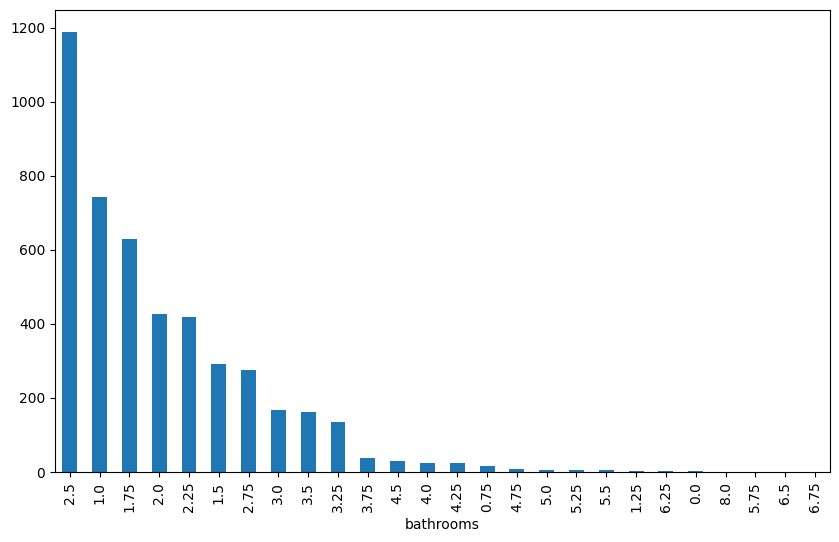

In [ ]:
mean = df["price"].mean()
median =df["price"].median()
mode = df["price"].mode()
print(mean , median, mode)
print(df.columns)
df['bathrooms'].value_counts().nlargest(30).plot(kind='bar', figsize=(10, 6))



In [ ]:
import seaborn as sns


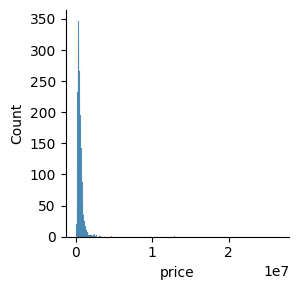

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'height' is the column you want to plot
sns.FacetGrid(df).map(sns.histplot, "price").add_legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


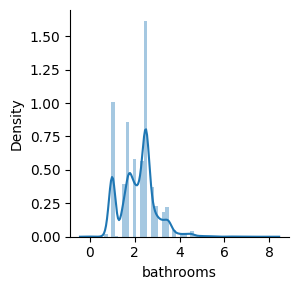

In [ ]:
sns.FacetGrid(df).map(sns.distplot,"bathrooms").add_legend()


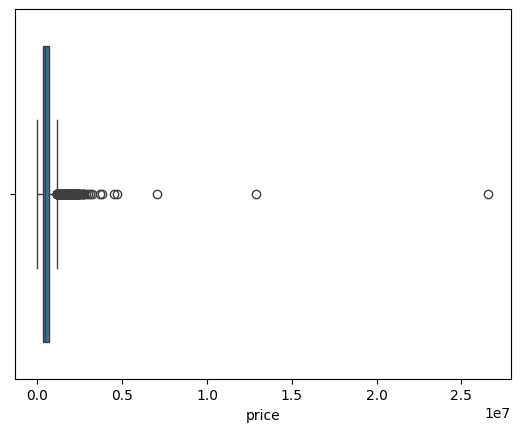

In [ ]:
sns.boxplot(x="price",data=df)
plt.show()

Text(0, 0.5, 'price')

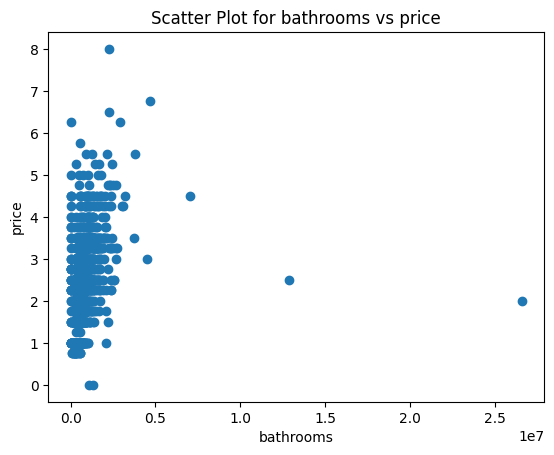

In [ ]:
plt.scatter(df["price"], df["bathrooms"])
plt.title("Scatter Plot for bathrooms vs price")
plt.xlabel("bathrooms")
plt.ylabel("price")



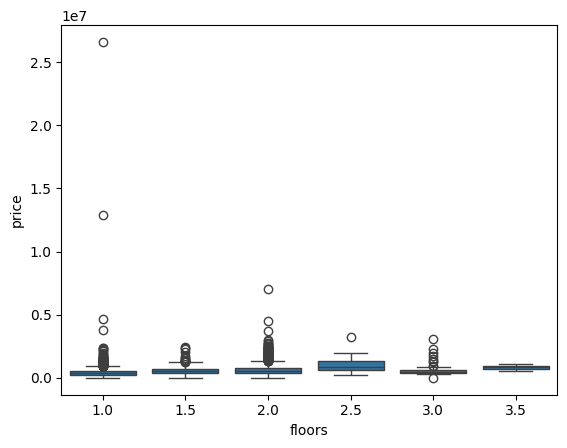

In [ ]:
sns.boxplot(x="floors",y="price",data=df)
plt.show()


<Axes: xlabel='sqft_living', ylabel='price'>

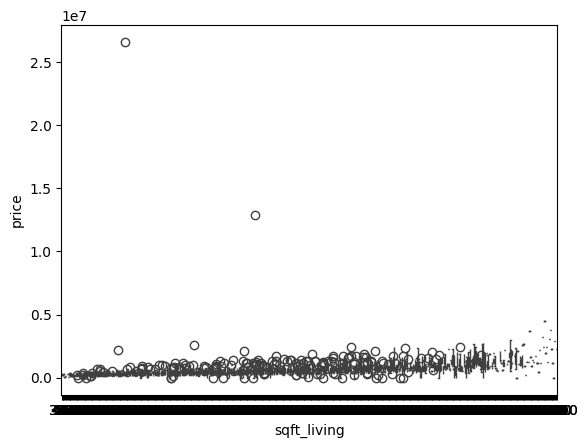

In [ ]:
#3. Plot another box plot with the price range and the driver wheel type
#boxplot to visualize the distribution of "price" with types of  "drive-wheels"
sns.boxplot(x="sqft_living", y="price",data=df)

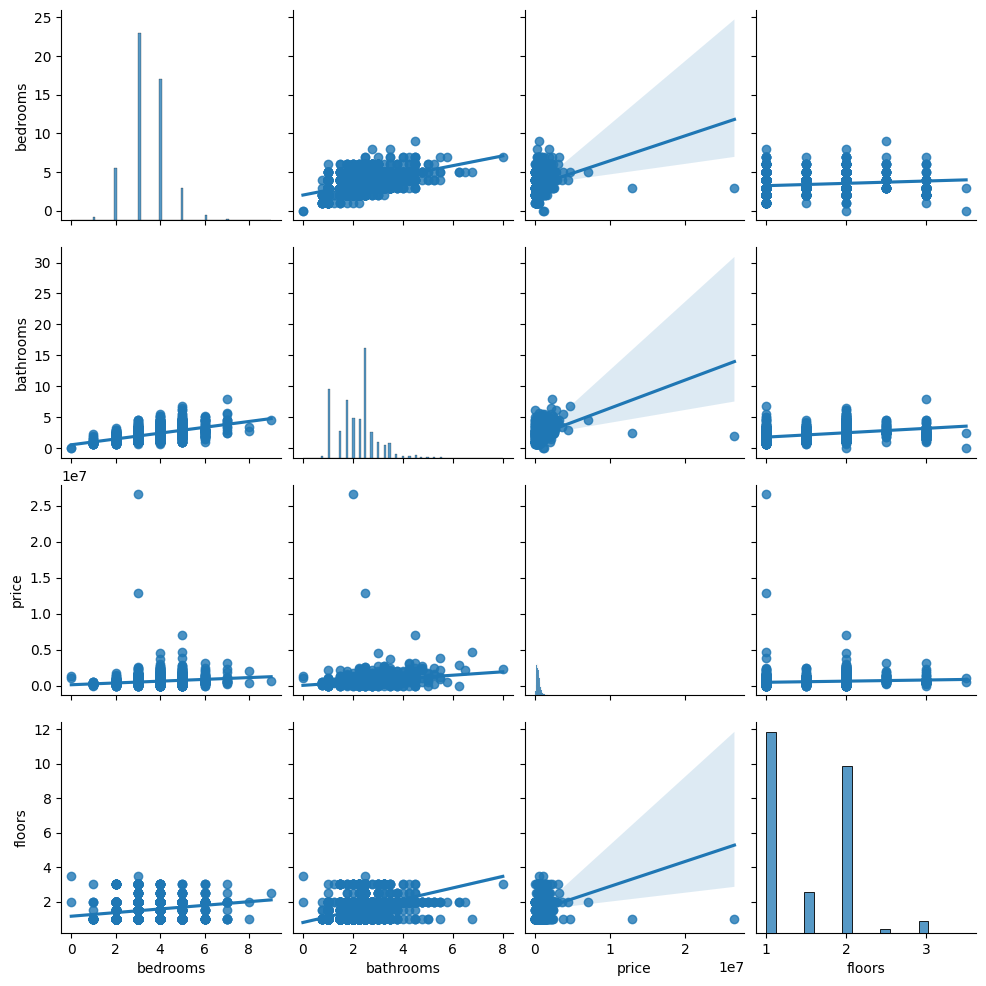

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correct the column names in the vars parameter based on your DataFrame's actual column names
sns.pairplot(df, vars=['bedrooms', 'bathrooms', 'price', 'floors'], kind="reg")
plt.show()


In [ ]:
correlation = df.corr(method='pearson', numeric_only=True)
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.228522,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,0.111002,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.211996,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.310988,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.073884,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.031423,-0.275013,0.522814,-0.255510,0.467481,-0.233996
view,0.228522,0.111002,0.211996,0.310988,0.073884,0.031423,1.000000,0.063036,0.174318,0.321576,-0.064636,0.023053
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.063036,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.174318,-0.178196,1.000000,-0.038723,0.408535,-0.160426
sqft_basement,0.210427,0.334165,0.298020,0.447206,0.034842,-0.255510,0.321576,0.200632,-0.038723,1.000000,-0.161675,0.043125


<Axes: >

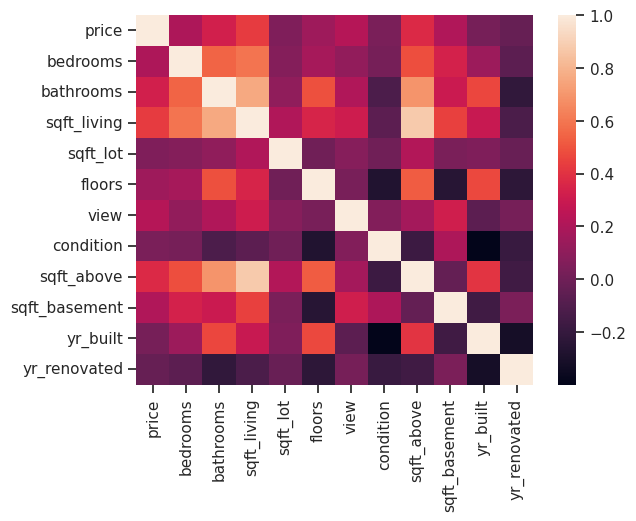

In [ ]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)


In [ ]:
import os
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=50)
zero_mean_series

array([-1.75094061,  0.04806464,  0.66991768,  0.52004961,  0.59819721,
        0.44924872, -0.89211899, -1.07208263,  3.78865086,  0.88854419,
       -0.59361908,  1.85850235, -0.72658877,  0.41647564, -0.22391988,
       -0.23614015,  1.24147343, -0.43075457, -1.12728454, -0.43931116,
       -0.35051884, -0.56930635, -1.20845132,  0.42822635,  1.17486155,
       -0.07723837,  1.13517623, -0.65281188,  0.86083963, -0.86513247,
       -0.1805048 , -0.42726208, -0.34600287, -1.24409356,  0.27235559,
        0.14439245,  0.65271145, -0.04186021, -0.03037461,  0.38720319,
        0.84358844,  0.14583479, -0.07547642, -0.24455639, -1.27962082,
       -0.34806553, -0.58565796, -0.60208457, -1.537777  , -0.16312884])

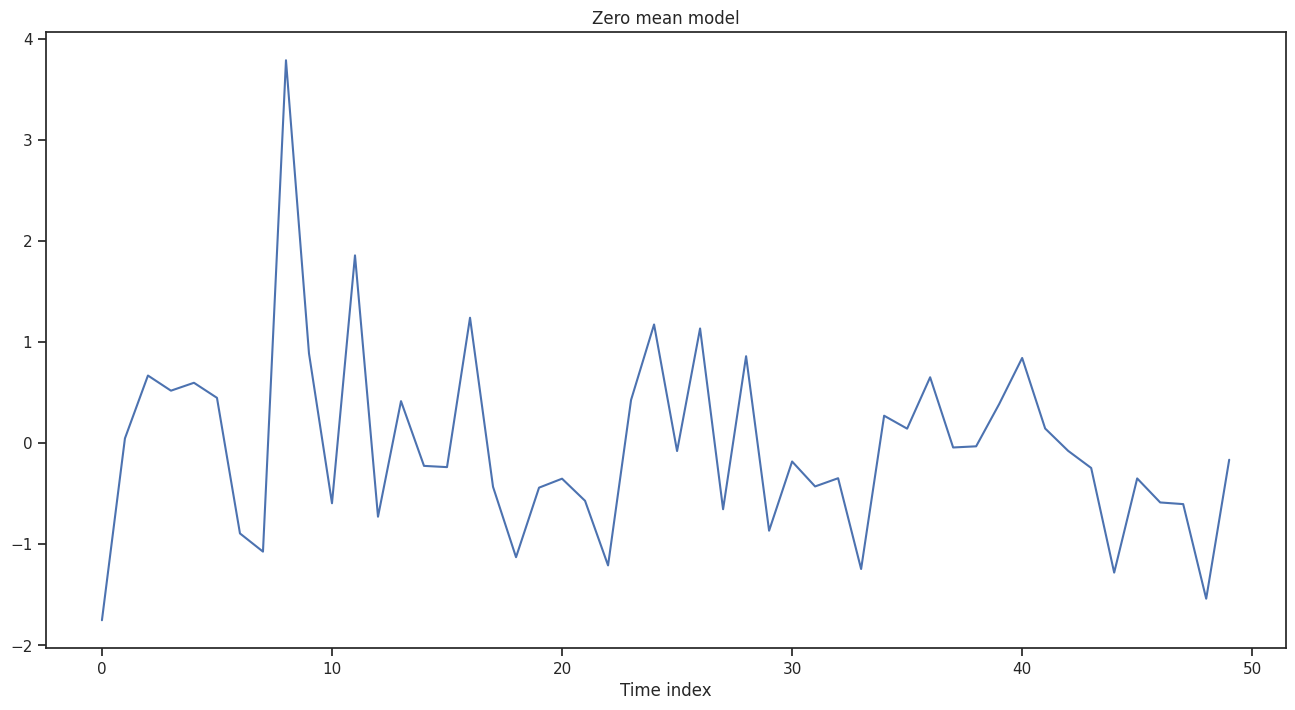

In [ ]:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=zero_mean_series)
g.set_title('Zero mean model')
g.set_xlabel('Time index')
plt.show()

In [ ]:
random_walk = np.cumsum(zero_mean_series)
random_walk

array([-1.75094061, -1.70287598, -1.03295829, -0.51290869,  0.08528853,
        0.53453724, -0.35758174, -1.42966438,  2.35898648,  3.24753067,
        2.65391158,  4.51241393,  3.78582516,  4.2023008 ,  3.97838092,
        3.74224076,  4.98371419,  4.55295963,  3.42567508,  2.98636393,
        2.63584509,  2.06653873,  0.85808741,  1.28631377,  2.46117531,
        2.38393694,  3.51911318,  2.86630129,  3.72714092,  2.86200846,
        2.68150366,  2.25424158,  1.90823871,  0.66414515,  0.93650074,
        1.0808932 ,  1.73360465,  1.69174444,  1.66136982,  2.04857301,
        2.89216145,  3.03799624,  2.96251982,  2.71796343,  1.43834261,
        1.09027708,  0.50461912, -0.09746546, -1.63524246, -1.79837129])

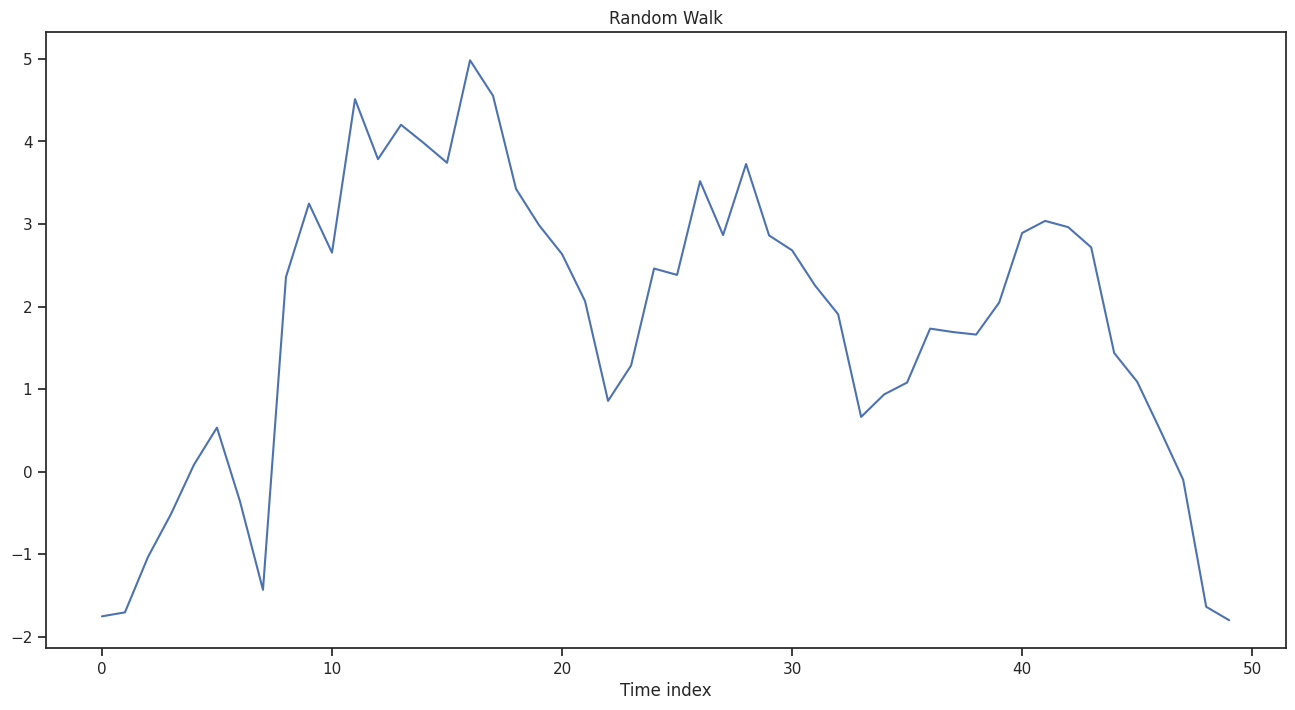

In [ ]:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index')
plt.show()



In [ ]:
df_power =pd.read_csv("/house price.csv")
df_power.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
df_power.shape

(4600, 18)

In [ ]:
print(df_power.tail(10))

               date        price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4590  08/07/14 0:00  380680.5556         4       2.50         2620      8331   
4591  08/07/14 0:00  396166.6667         3       1.75         1880      5752   
4592  08/07/14 0:00  252980.0000         4       2.50         2530      8169   
4593  08/07/14 0:00  289373.3077         3       2.50         2538      4600   
4594  09/07/14 0:00  210614.2857         3       2.50         1610      7223   
4595  09/07/14 0:00  308166.6667         3       1.75         1510      6360   
4596  09/07/14 0:00  534333.3333         3       2.50         1460      7573   
4597  09/07/14 0:00  416904.1667         3       2.50         3010      7014   
4598  10/07/14 0:00  203400.0000         4       2.00         2090      6630   
4599  10/07/14 0:00  220600.0000         3       2.50         1490      8102   

      floors waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
4590     2.0          0   0.0         

In [ ]:
df_power.dtypes

,0
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,object
view,float64
condition,int64


In [ ]:
sns.set(rc={'figure.figsize':(11, 4)}) #Runtime Configuration
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

In [ ]:
dataset = pd.read_csv('/house price.csv')
X = dataset.iloc[:, [3, 4]].values


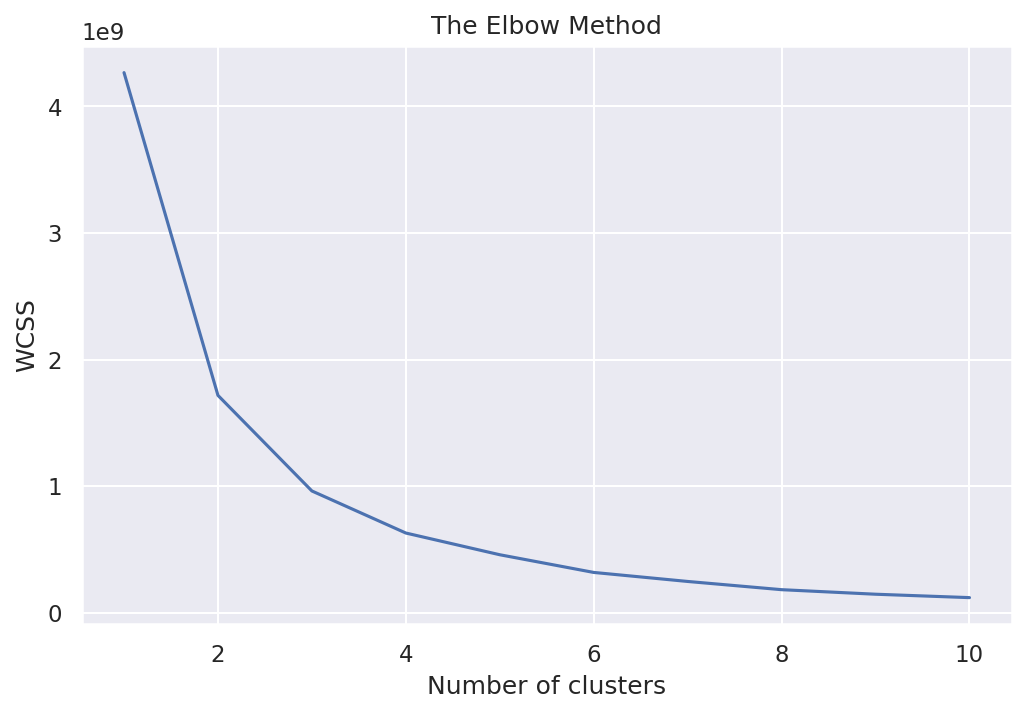

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


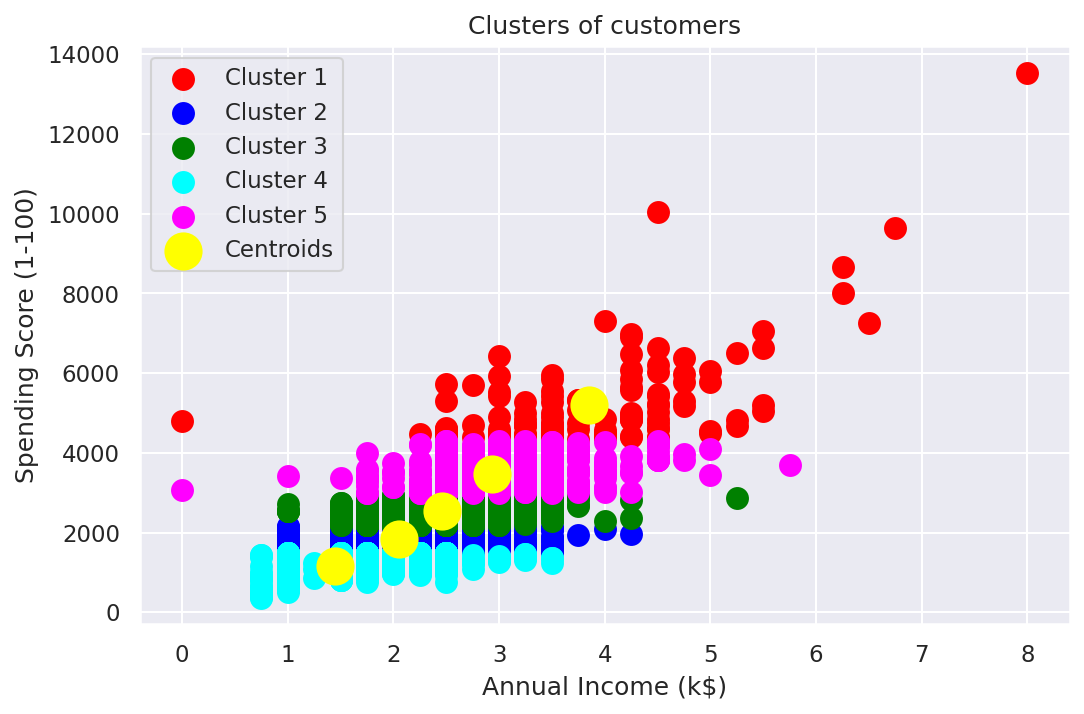

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
df = pd.read_csv('/house price.csv')


Available columns in DataFrame: Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


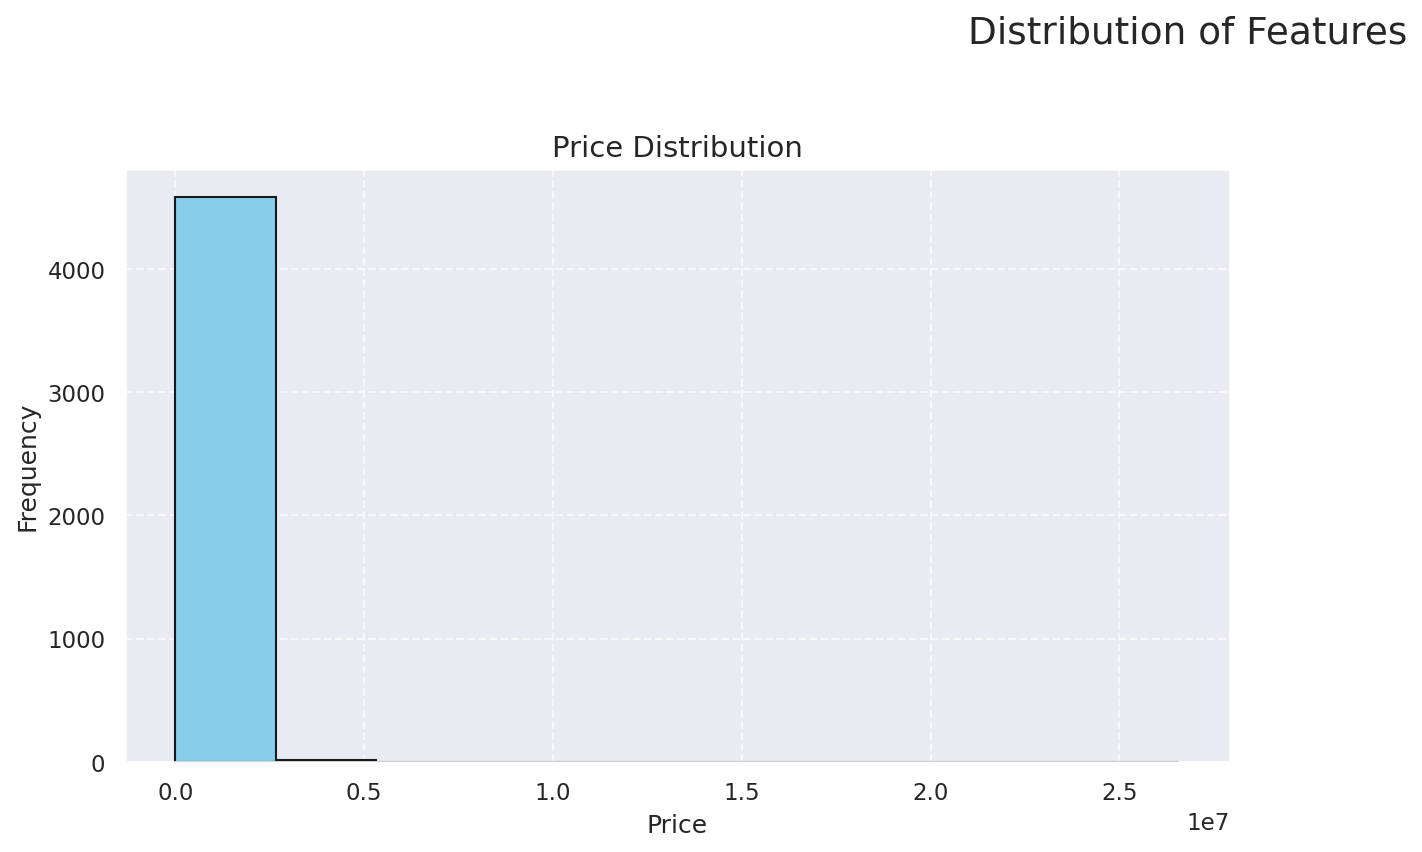

In [ ]:
import matplotlib.pyplot as plt

# Print the columns in the DataFrame to help verify names
print("Available columns in DataFrame:", df.columns)

# Define column names based on what's in the DataFrame
# Adjust these names as per your DataFrame's actual columns
required_columns = ['price', 'bedroom', 'floor', 'bathroom']

# Verify if each required column exists in df, and create histograms only for existing columns
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: These columns are missing and will be skipped: {missing_columns}")
    # Remove missing columns from the required list
    required_columns = [col for col in required_columns if col in df.columns]

# Plotting histograms for each existing column
plt.figure(figsize=(16, 10))
plt.suptitle("Distribution of Features", fontsize=18)

# Generate a histogram for each valid column
for i, col in enumerate(required_columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], color='skyblue', edgecolor='k')
    plt.title(f"{col.capitalize()} Distribution", fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
X = df.iloc[:,[3,4]].values

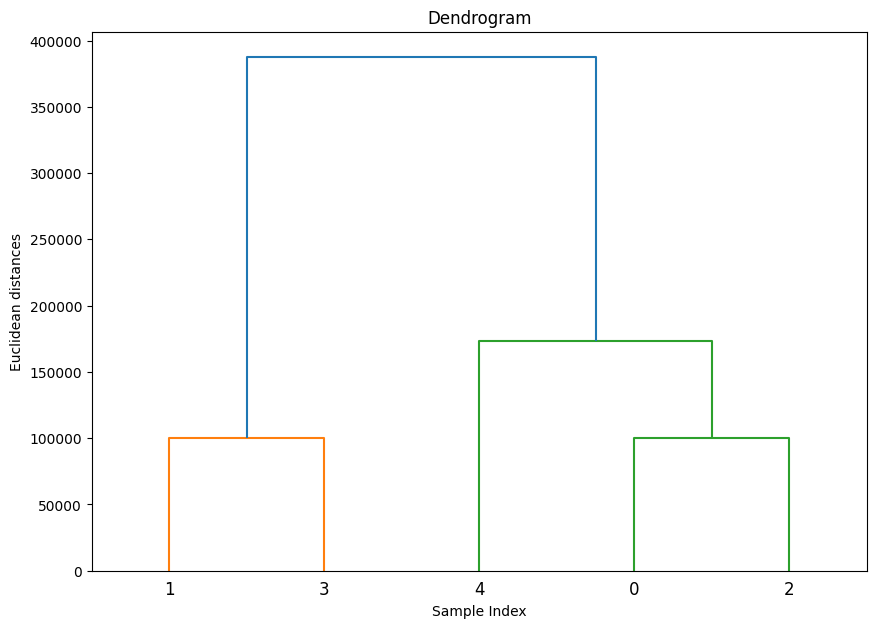

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Sample data: bedrooms, price, floor, bathrooms
data = np.array([
    [2, 500000, 1, 1],
    [3, 700000, 2, 2],
    [2, 600000, 1, 1],
    [4, 800000, 3, 3],
    [1, 400000, 1, 1]
])

# Define X as the dataset
X = data

# Create the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
plt.xlabel('Sample Index')
plt.ylabel('Euclidean distances')

# Generate the dendrogram using Ward's method
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()


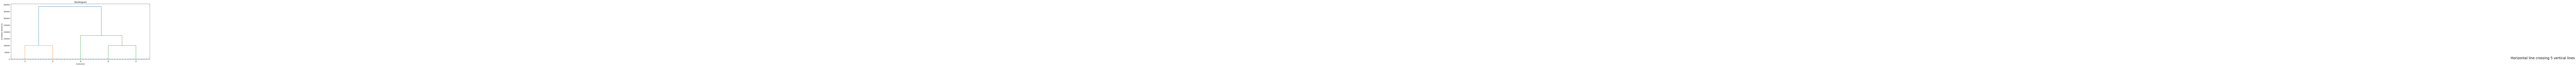

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.hlines(y=190,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=900,y=220,s='Horizontal line crossing 5 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150


In [4]:
df = pd.read_csv("/house price.csv")



In [5]:
print(df.keys())

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [9]:
df.head()
print(df.columns)
print(df.head())


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')
            date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02/05/14 0:00   313000.0         3       1.50         1340      7912   
1  02/05/14 0:00  2384000.0         5       2.50         3650      9050   
2  02/05/14 0:00   342000.0         3       2.00         1930     11947   
3  02/05/14 0:00   420000.0         3       2.25         2000      8030   
4  02/05/14 0:00   550000.0         4       2.50         1940     10500   

   floors waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5          0   0.0          3        1340              0      1955   
1     2.0          0   4.0          5        3370            280      1921   
2     1.0          0   0.0          4        1930 

In [10]:
df.isna().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,4
view,1
condition,0


<Axes: >

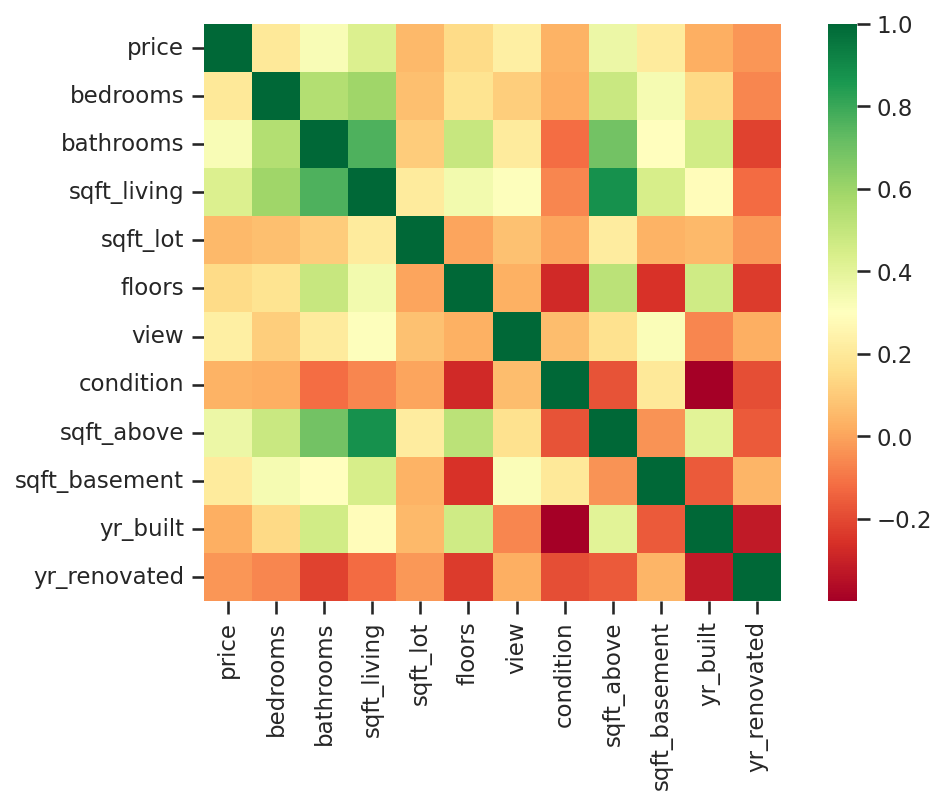

In [13]:
numeric_df = df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), square=True, cmap='RdYlGn')


In [17]:
print(df.columns)


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [21]:
print(df.columns.tolist())
print(df.head())
print(df.info())
df.rename(columns={'problematic_column_name': 'new_column_name'}, inplace=True)


['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']
            date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02/05/14 0:00   313000.0         3       1.50         1340      7912   
1  02/05/14 0:00  2384000.0         5       2.50         3650      9050   
2  02/05/14 0:00   342000.0         3       2.00         1930     11947   
3  02/05/14 0:00   420000.0         3       2.25         2000      8030   
4  02/05/14 0:00   550000.0         4       2.50         1940     10500   

   floors waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5          0   0.0          3        1340              0      1955   
1     2.0          0   4.0          5        3370            280      1921   
2     1.0          0   0.0          4        1930              0      1966   
3     1.0          0  

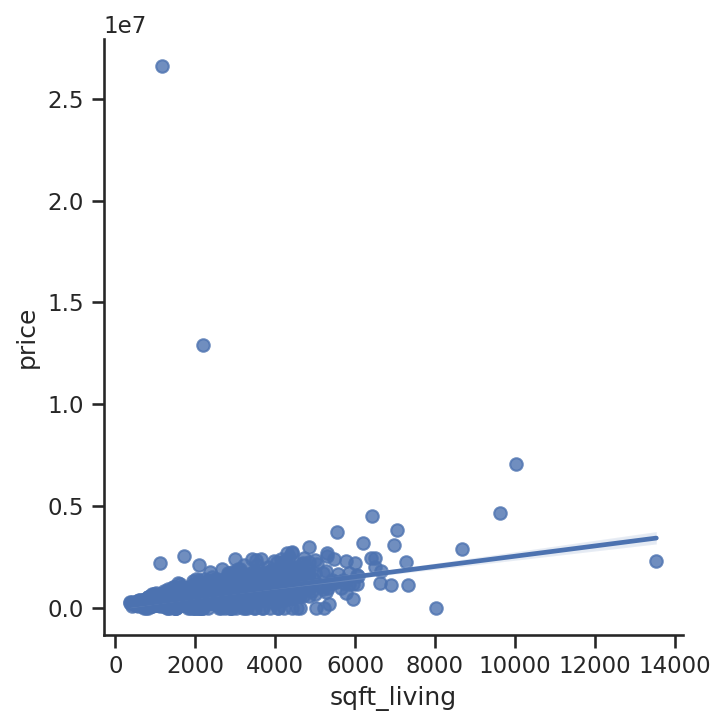

In [24]:
sns.lmplot(x='sqft_living', y='price', data=df)


In [26]:
# Define features (X) and target (y)
X = df[['sqft_living', 'bedrooms', 'bathrooms']]  # Choose your predictor columns
y = df['price']  # Target column

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [28]:
# Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fitting the training data to our model
regressor.fit(X_train, y_train)


LinearRegression()

In [29]:
regressor.score(X_test, y_test)

0.4030271171215418

In [31]:
y_pred=regressor.predict(X_test)
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),
'Predicted': y_pred.flatten()})
evaluate.head(10)


,Actual,Predicted
0,525000.0,580385.377775
1,688000.0,771206.501856
2,1712500.0,820412.546483
3,720000.0,664517.828274
4,735000.0,770587.884122
5,350000.0,541783.050142
6,510250.0,367008.030612
7,308500.0,259981.797415
8,495000.0,473143.526697
9,1400000.0,541445.490527


<Axes: >

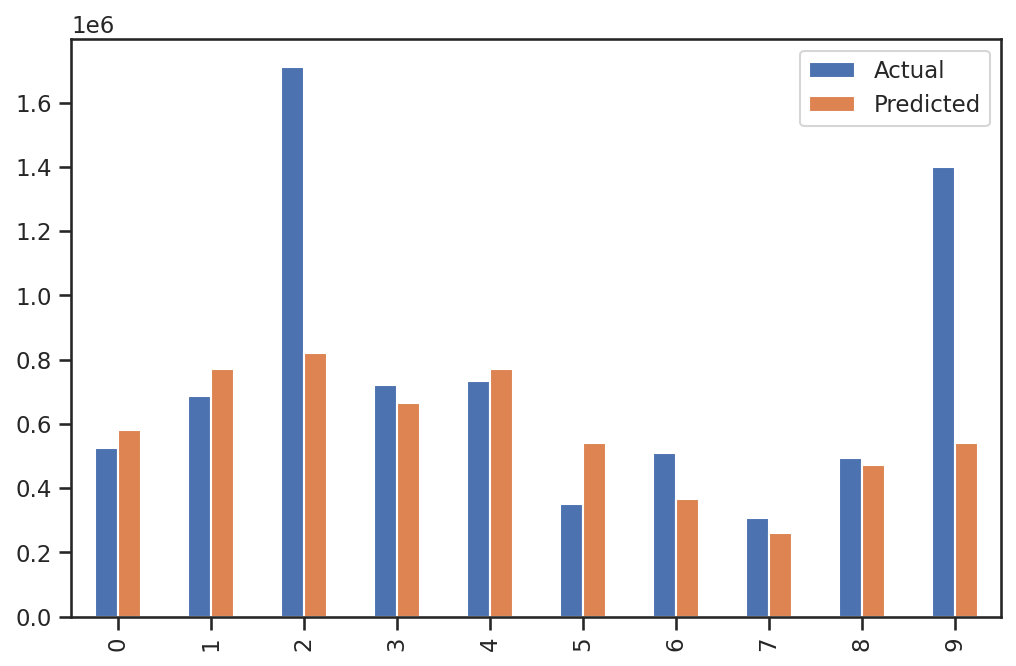

In [32]:
evaluate.head(10).plot(kind = 'bar')

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"MAE score: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")


R2 score: 0.4030271171215418
MAE score: 175824.44017377615
MSE score: 73025967333.21234
